In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

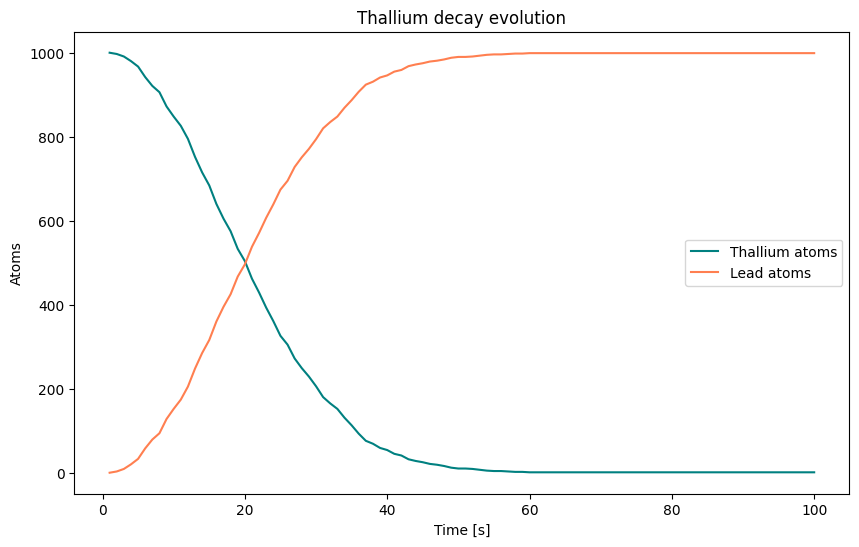

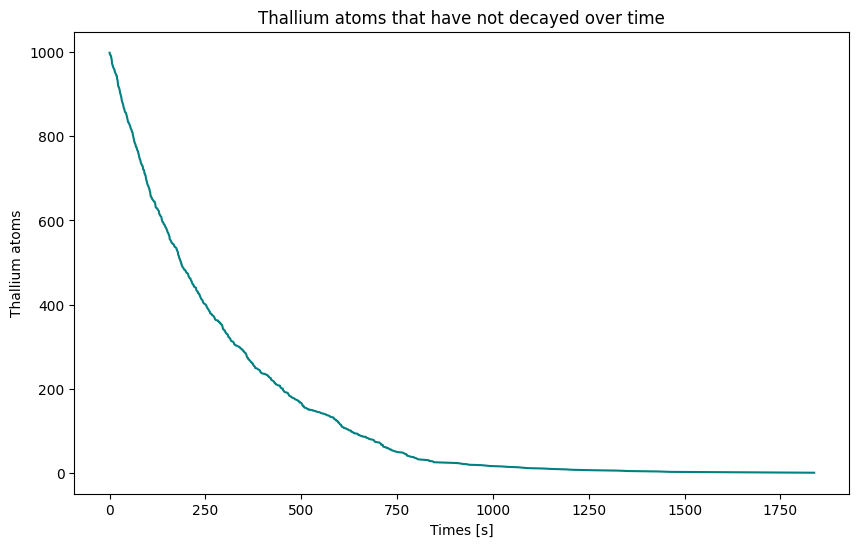

In [2]:
def prob(t, tau):
    return 1-2**(-t/tau)

tau = 3.052*60   #seconds

#Thallium
Tl_atoms = np.empty(100)
Nt = 1000  #number of Thallium atoms
Tl_atoms[0]= Nt

#Lead
L_atoms = np.empty(100)
Nl = 0     #number of Lead atoms
L_atoms[0]= Nl


for t in range(1, 100, 1):
    to_decay = 0
    instant_p = prob(t, tau)
    for i in range(1, Nt, 1): # For every Thallium atom try to see if decaded
        a = 0
        if np.random.rand() <= instant_p: # Decayed
            a=1
        else:
            a=0
        to_decay = to_decay +  a
    
    #Subtract the total number of Tl atoms that decayed at each step from the Tl sample
    Nt = Nt - to_decay
    Tl_atoms[t] = Nt
    #Add them to the Lead one
    Nl = Nl + to_decay
    L_atoms[t] = Nl
    
#Plot the evolution of the two sets as a function of time
fig = plt.figure(figsize=(10,6))
temp = np.linspace(1,100,100)
plt.plot(temp, Tl_atoms, color='teal', label='Thallium atoms')
plt.plot(temp, L_atoms, color='coral', label='Lead atoms')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Atoms')
plt.title('Thallium decay evolution')

#Repeat the exercise by means of the inverse transform method
def prob2(t,tau):
    return 2**(-t/tau)*math.log(2)/tau

def expon_cdf(x, tau):
    """  CDF of exponetial distribution  """
    return (1 - 2**(-x/tau))

def expon_icdf(p, tau):
    """  Inverse CDF of exponential distribution  """
    return -tau* np.log2(1 - p)

#draw 1000 random numbers from the non-uniform probability distribution 
N = 1000
u = np.random.random(N)
t = expon_icdf(u,tau)  #apply the inverse of the CDF
decay_time = np.sort(t)[::-1]

#Make a plot showing the number of atoms that have not decayed as a function of time
fig2 = plt.figure(figsize=(10,6))
x = np.arange(0,len(decay_time),1)

plt.plot(decay_time, x, 'teal')
plt.title('Thallium atoms that have not decayed over time')
plt.xlabel('Times [s]')
plt.ylabel('Thallium atoms')

plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

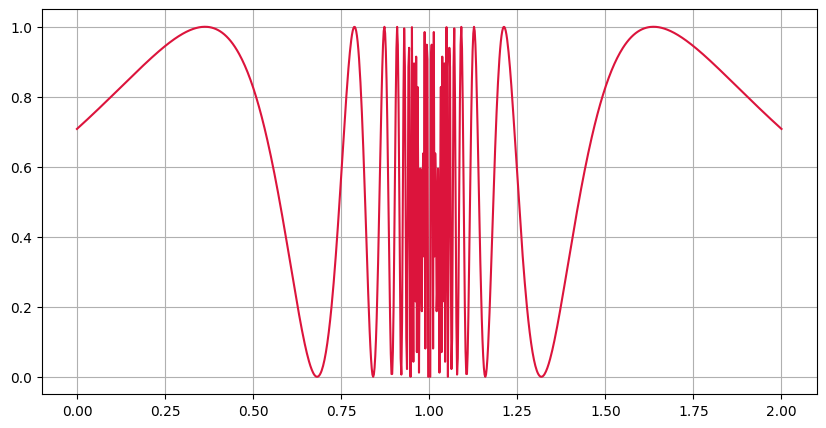

Integral mean:  1.3465313999999997
Integral standard deviation:  0.003411983886245658
The error is  0.0003411983886245658

Integral calculated with the mean value method:  1.346759130280835
Integral standard deviation with the mean value method:  0.0022426387529859496
With the mean value method, the error is  0.00022426387529859496


In [3]:
#define the given function
def f(x):
    return (np.sin(1./(1-x)))**2

#plot the function
fig = plt.figure(figsize=(10,5))
x = np.linspace(0, 2, 1000)
plt.plot(x, f(x), 'crimson')
plt.grid()
plt.show()

#Compute the integral of f(x) between 0 and 2 with the hit/miss method
#repeat the integral N times
N = 100000
Nrepeat = 100
Integ = []

for n in range(Nrepeat):
    count = 0
    for i in range(N):
        x = 2 * np.random.random() # x is random uniform between 0 and 2
        y = np.random.random()     # y is random uniform between 0 and 1
        if y < f(x): 
            count += 1
    I = 2 * count / N
    Integ.append(I)

I_mean = np.mean(Integ)
I_var = np.var(Integ)
I_sd = np.sqrt(I_var)

print('Integral mean: ', I_mean)
print('Integral standard deviation: ', I_sd)


#Evaluate the error of your estimate
err = I_sd/math.sqrt(Nrepeat)
print('The error is ', err)

#Repeat the integral with the mean value method
I_mvm = []

for i in range(Nrepeat): #repeat integral N times for a better estimation
    summ = 0
    for i in range(N):
        x = 2 * np.random.uniform()
        y = f(x)
        summ +=y
    I = 2*summ/N
    I_mvm.append(I)


print('\nIntegral calculated with the mean value method: ', np.mean(I_mvm))
sd_mvm = np.sqrt(np.var(I_mvm))
print('Integral standard deviation with the mean value method: ', sd_mvm)

#Evaluate the error of your estimate
err_mvm = sd_mvm/math.sqrt(Nrepeat)
print('With the mean value method, the error is ', err_mvm)


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [4]:
#define the functions 
def ext_sphere(x,dim):
    c=0
    for i in range(dim):
        c += x[i]**2
    if c <=1 : return 1
    else: return 0
    

#Compute the area of a circle of unit radius
dim = 2
points = 100000

x = np.random.uniform(-1, 1, (points, dim))
val = np.zeros(points)

for i in range(points):
    val[i] = ext_sphere(x[i, :],2)

Ic = (2**dim)*np.mean(val)
print('The area of the circle is: ', Ic)


#Generalize the result for a 10D sphere
dim = 10
points = 10000000

#Compute the ipervolume of a circle of unit radius
x10 = np.random.uniform(-1, 1, (points, dim))
val10 = np.zeros(points)

for i in range(points):
    val10[i] = ext_sphere(x10[i, :],dim)

Ic10 = (2**dim)*np.mean(val10)
print('The ipervolume of the 10D sphere is: ', Ic10)



The area of the circle is:  3.142
The ipervolume of the 10D sphere is:  2.5235456


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [10]:
#define the functions
def f(x): 
    return x**(-1/2)/(np.exp(x)+1)

def w(x):
    return 1/np.sqrt(x)

# generate a distribution of random points according to the weight function
N = 1000
x = stats.powerlaw.rvs(0.5, size=N)

#calculate the integral of w(x)
w_I = scipy.integrate.quad(w, 0, 1)[0]

#calculate the value of the integral
I = 1/N * w_I * np.sum(f(x)/w(x))

print('The value of the integral is:',I)



The value of the integral is: 0.8402351197330717
